# BatDetect2 - Demo

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/macaodha/batdetect2/blob/master/batdetect2_notebook.ipynb)

This notebook gives an example of how to run the BatDetect2 code. You can either run it locally on your own computer or on Google Colab. 

It first specifies some arguments, loads the model, selects the audio file of interest, runs the model, and finally plots the results. 

Click [here](https://colab.research.google.com/github/macaodha/batdetect2/blob/master/batdetect2_notebook.ipynb) to run it on on Google Colab. Make sure to enable GPU usage on Colab for this Notebook to make it run faster. On Colab you will also have to uncomment some lines - see below for details. 

### Load BatDetect and configure

In [1]:
# the following lines are only needed in Colab.
# clone the code and change directory
#!git clone https://github.com/macaodha/batdetect2
#%cd batdetect2

In [2]:
# Import batdetect2 api and plotting functions
from batdetect2 import api, plot

In [3]:
# Configure the run
config = api.get_config(
    detection_threshold=0.3,
    time_expansion_factor=1,
    max_duration=3,
)

### Select the audio file and run the model

In [4]:
# choose an audio file
audio_file = "example_data/audio/20170701_213954-MYOMYS-LR_0_0.5.wav"

# the following lines are only needed in Colab
# alternatively you can upload your own file
# from google.colab import files
# uploaded = files.upload()
# audio_file = list(uploaded.keys())[0]

In [5]:
# run the model
results = api.process_file(audio_file, config=config)

### Print the results

In [6]:
# print summary info for the individual detections
api.print_summary(results)

Results for 20170701_213954-MYOMYS-LR_0_0.5.wav
15 calls detected

time	prob	lfreq	species_name
0.0225	0.55	33203	Myotis mystacinus
0.0525	0.679	28046	Myotis mystacinus
0.1155	0.488	33203	Myotis mystacinus
0.1385	0.46	48671	Pipistrellus pipistrellus
0.1445	0.656	27187	Myotis mystacinus
0.2025	0.549	34062	Myotis mystacinus
0.2195	0.503	48671	Pipistrellus pipistrellus
0.2315	0.672	27187	Myotis mystacinus
0.2995	0.65	48671	Pipistrellus pipistrellus
0.3245	0.687	27187	Myotis mystacinus
0.3705	0.547	34062	Myotis mystacinus
0.4125	0.664	28906	Myotis mystacinus
0.4365	0.544	36640	Myotis mystacinus
0.4745	0.73	48671	Pipistrellus pipistrellus
0.4895	0.404	36640	Myotis mystacinus


### Visualise the detections

In [7]:
# read the audio file
audio = api.load_audio(audio_file)

In [8]:
# generate spectrogram
spec = api.generate_spectrogram(audio, config=config)

In [9]:
# compute the detections
detections, _ = api.process_spectrogram(spec, config=config)

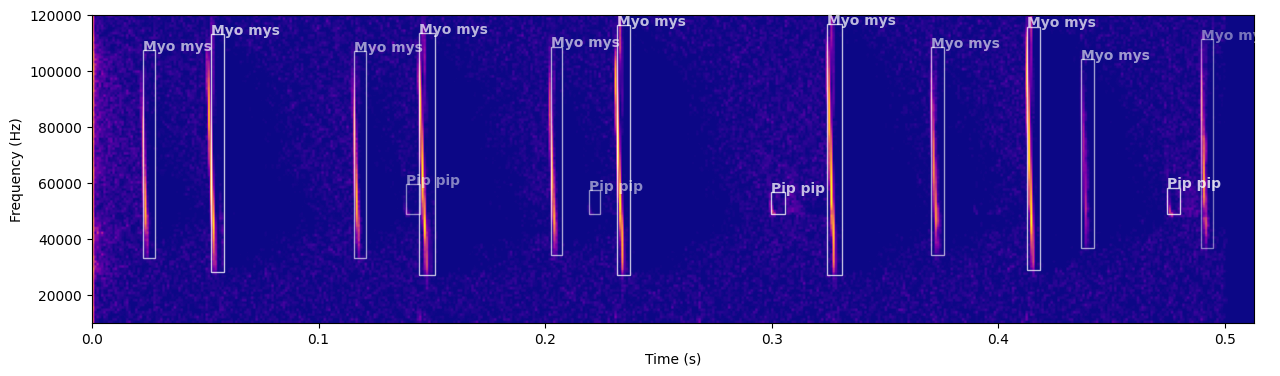

In [10]:
# plot detections
ax = plot.spectrogram_with_detections(spec, detections, config=config, figsize=(15, 4))

### Use extracted features

In [11]:
# the process_spectrogram function also returns a feature vector for each detection
detections, features = api.process_spectrogram(spec, config=config)

In [12]:
# We will use seaborn to plot the PCA projection of the features
# Make sure it is installed by running the following line
# %pip install seaborn

import seaborn as sns
from sklearn.decomposition import PCA

<AxesSubplot: >

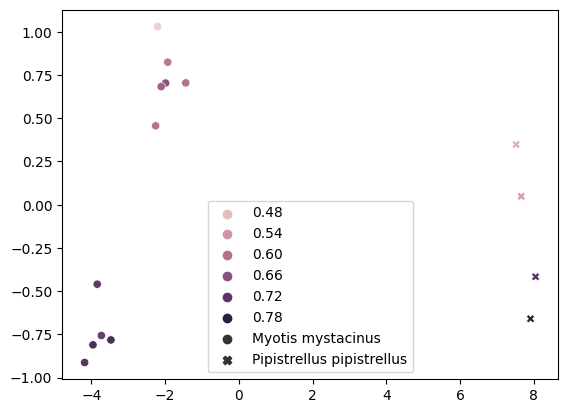

In [13]:
X, Y = PCA(n_components=2).fit_transform(features).T
sns.scatterplot(
    x=X,
    y=Y,
    style=[d["class"] for d in detections],
    hue=[d["det_prob"] for d in detections],
)